# N_Gram Analysis of Oz
In this project we will use the spacy and sklearn libraries to do some n_gram analysis of The Stories of Oz from project gutenburg. The start of this text is kept in a pickle file and will need to be extracted.. Prior to starting this analysis the libraries and english core word library from spacy are installed.
    
The code, along with the files necessary and versions of packages in this instance can be found on this repo: https://github.com/Benjamin-Siebold/MSDS-682-Text-Analytics

In [3]:
import spacy
import nltk
nlp = spacy.load('en_core_web_lg')
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

### 1 Import functions and text
The first step in this analysis is to create the definitions and import the text necessary for analysis. Additionally, the text will need to be cleaned for POS tagging. For this, we will only look at numbers or words and remove punctuation from our analysis

In [4]:
woo = []
with open('C:\\Users\\bsieb\\Documents\\GitHub\\MSDS-682-Text-Analytics\\Week-2\\wizard_of_oz_stories.pk', 'rb') as oz:
    woo.append(pickle.load(oz))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bsieb\\Documents\\GitHub\\MSDS-682-Text-Analytics\\Week-2\\wizard_of_oz_stories.pk'

In [ ]:
oz = [sentence for chapter in woo for sentence in chapter]

In [ ]:
oz_text = ' '.join(oz)

In [ ]:
nlp_oz = nlp(oz_text)

In [1]:
nlp_oz

NameError: name 'nlp_oz' is not defined

In [41]:
words = []
pos = []
for word in nlp_oz:
    if word.is_alpha or word.is_digit:
        words.append(word.lower_)
        pos.append(word.pos_)
oz_df = pd.DataFrame({'word':words, 'pos':pos})     

In [37]:
oz_df

,word,pos
0,in,ADP
1,the,DET
2,splendid,ADJ
3,palace,NOUN
4,of,ADP
5,the,DET
6,emerald,PROPN
7,city,PROPN
8,which,PRON
9,is,AUX


In [38]:
oz_df['pos'].value_counts()

NOUN     1717
VERB     1593
DET      1331
PRON     1265
ADP      1066
ADV       778
ADJ       764
AUX       665
PROPN     659
CCONJ     567
PART      249
SCONJ     245
NUM        81
INTJ       21
X           1
Name: pos, dtype: int64

In [30]:
oz_df.groupby('word')['pos'].value_counts()#.sort_values(by='word')

word          pos  
a             DET      284
              ADV        1
able          ADJ        2
aboard        ADP        1
              ADV        1
abounded      VERB       1
about         ADP        5
              ADV        3
              ADJ        1
above         ADP        1
              ADV        1
accident      NOUN       2
accidentally  ADV        1
accompany     VERB       1
accomplish    VERB       2
accomplished  VERB       1
accustomed    VERB       1
across        ADP        7
act           NOUN       2
actions       NOUN       1
active        ADJ        2
actually      ADV        1
added         VERB       7
admitted      VERB       1
adventure     NOUN       1
adventures    NOUN       2
advised       VERB       2
afraid        ADJ        5
after         ADP        8
afternoon     NOUN       2
                      ... 
works         VERB       3
              NOUN       2
world         NOUN       1
worn          ADJ        1
worry         NOUN       1
        

### 2 - Apply N_Gram counts for 2, 3 and 4 ngrams
Next, we will use the sklearn package to look at n_gram analysis of the oz text. We will create n_grams for 2, 3, and 4 grams, in addition to this, word clouds for each gram will be built, along with Zipfs Plots for each gram

In [83]:
vectorizer_2 = CountVectorizer(ngram_range = (2,2))
vectorizer_3 = CountVectorizer(ngram_range = (3,3))
vectorizer_4 = CountVectorizer(ngram_range = (4,4))

In [62]:
ngram_2_counts = vectorizer_2.fit_transform([oz_text])
oz_2_counts = np.array(ngram_2_counts.todense()).flatten()
ngrams_2 = vectorizer_2.vocabulary_

In [89]:
oz_2_counts

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [131]:
ngrams_2

{'in the': 3087,
 'the splendid': 6102,
 'splendid palace': 5517,
 'palace of': 4553,
 'of the': 4255,
 'the emerald': 5935,
 'emerald city': 1774,
 'city which': 1267,
 'which is': 7349,
 'is in': 3182,
 'the center': 5892,
 'center of': 1223,
 'the fairy': 5942,
 'fairy land': 1893,
 'land of': 3430,
 'of oz': 4235,
 'oz is': 4493,
 'is great': 3180,
 'great throne': 2372,
 'throne room': 6475,
 'room where': 4993,
 'where princess': 7333,
 'princess ozma': 4734,
 'ozma the': 4531,
 'the ruler': 6076,
 'ruler for': 5019,
 'for an': 2050,
 'an hour': 167,
 'hour each': 2921,
 'each day': 1731,
 'day sits': 1495,
 'sits in': 5362,
 'in throne': 3092,
 'throne of': 6473,
 'of glistening': 4210,
 'glistening emeralds': 2297,
 'emeralds and': 1775,
 'and listens': 312,
 'listens to': 3545,
 'to all': 6569,
 'all the': 115,
 'the troubles': 6135,
 'troubles of': 6823,
 'of her': 4213,
 'her people': 2731,
 'people which': 4603,
 'which they': 7355,
 'they are': 6304,
 'are sure': 545,
 'su

In [75]:
freq_dict_2 = {}
for v, i in vectorizer_2.vocabulary_.items():
    freq_dict_2[v] = oz_2_counts[i]

In [107]:
from scipy.stats import zipf

counts_2 = np.array(list(freq_dict_2.values()))
tokens_2 = list(freq_dict_2.keys())
ranks_2 = np.arange(1, len(counts) +1)
indices_2 = np.argsort(-counts)
frequency_2 = counts[indices]
normalized_frequencies_2 = counts[indices] / sum(counts)

In [128]:
from collections import OrderedDict
sorted_dict_2 = OrderedDict(sorted(freq_dict_2.items(), key=lambda kv: kv[1],  reverse=True))
sorted_dict_2

OrderedDict([('of the', 72),
             ('in the', 44),
             ('and the', 44),
             ('to the', 43),
             ('the scarecrow', 33),
             ('the wizard', 31),
             ('of oz', 28),
             ('said the', 28),
             ('the tin', 27),
             ('he was', 27),
             ('the little', 25),
             ('the lion', 21),
             ('into the', 20),
             ('at the', 20),
             ('the tiger', 19),
             ('tin woodman', 18),
             ('nome king', 17),
             ('upon the', 16),
             ('the sawhorse', 16),
             ('out of', 15),
             ('the nome', 15),
             ('the king', 15),
             ('but the', 14),
             ('to be', 14),
             ('then he', 14),
             ('through the', 13),
             ('as the', 12),
             ('no one', 12),
             ('that he', 12),
             ('little wizard', 12),
             ('from the', 12),
             ('the ground', 12),
       

From the above, there are a few 2 ngrams that aren't very benificial to help with what is being talked about. The top 4 are all multiple stop words in succession. After that, however; combinations such as "nome king" and "little wizard" let us get some insight to the types of characters in the book. Additionally, we can see many of the character involved in the stories, from "the tiger" to "the lion".

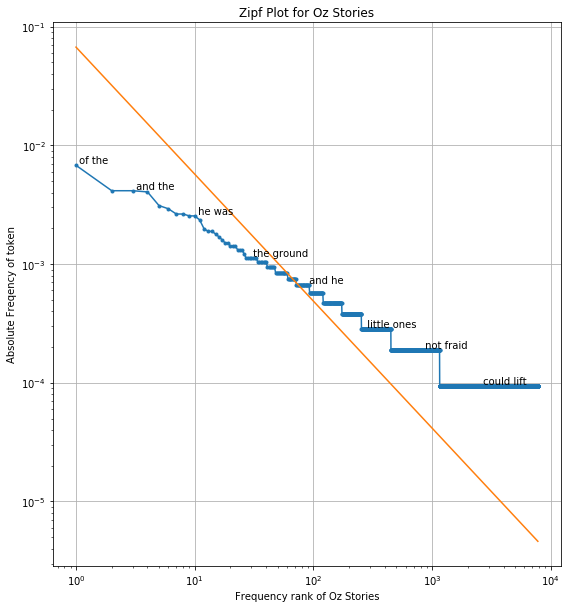

In [129]:
f = plt.figure(figsize=(10, 10))
plt.loglog(ranks, normalized_frequencies, marker=".")
plt.loglog(ranks, [z for z in zipf.pmf(ranks, 1.07)])

plt.title("Zipf Plot for Oz Stories")
plt.xlabel("Frequency rank of Oz Stories")
plt.ylabel("Absolute Freqency of token")

ax = plt.gca()
ax.set_aspect('equal')
plt.grid(True)

last_freq=None
for i in list(np.logspace(-0.5, np.log10(len(counts)-1),10).astype(int)):
    if last_freq != normalized_frequencies[i]:
        # ensure words don't overlap...make sure y-val is different
        dummy = plt.text(ranks[i], normalized_frequencies[i]," "+ tokens[indices[i]],
                         verticalalignment="bottom",horizontalalignment="left")last_freq=normalized_frequencies[i

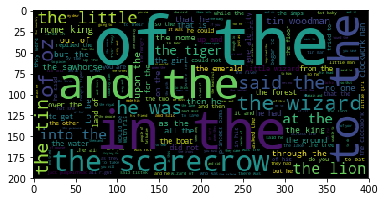

In [76]:
wc = WordCloud()
plt.imshow(wc.generate_from_frequencies(freq_dict_2))

### 3 Grams

In [64]:
ngram_3_counts = vectorizer_3.fit_transform([oz_text])
oz_3_counts = np.array(ngram_3_counts.todense()).flatten()
ngrams_3 = vectorizer_3.vocabulary_

In [65]:
ngrams_3

{'in the splendid': 3849,
 'the splendid palace': 7779,
 'splendid palace of': 6873,
 'palace of the': 5767,
 'of the emerald': 5344,
 'the emerald city': 7408,
 'emerald city which': 2236,
 'city which is': 1658,
 'which is in': 9534,
 'is in the': 3986,
 'in the center': 3826,
 'the center of': 7348,
 'center of the': 1607,
 'of the fairy': 5345,
 'the fairy land': 7415,
 'fairy land of': 2364,
 'land of oz': 4291,
 'of oz is': 5293,
 'oz is great': 5698,
 'is great throne': 3984,
 'great throne room': 2928,
 'throne room where': 8322,
 'room where princess': 6246,
 'where princess ozma': 9508,
 'princess ozma the': 5963,
 'ozma the ruler': 5743,
 'the ruler for': 7708,
 'ruler for an': 6272,
 'for an hour': 2539,
 'an hour each': 207,
 'hour each day': 3615,
 'each day sits': 2186,
 'day sits in': 1920,
 'sits in throne': 6688,
 'in throne of': 3868,
 'throne of glistening': 8318,
 'of glistening emeralds': 5245,
 'glistening emeralds and': 2846,
 'emeralds and listens': 2238,
 'and

In [77]:
freq_dict_3 = {}
for v, i in vectorizer_3.vocabulary_.items():
    freq_dict_3[v] = oz_3_counts[i]

In [134]:
sorted_dict_3 = OrderedDict(sorted(freq_dict_3.items(), key=lambda kv: kv[1],  reverse=True))
sorted_dict_3

OrderedDict([('the tin woodman', 18),
             ('the nome king', 15),
             ('the emerald city', 10),
             ('out of the', 10),
             ('land of oz', 9),
             ('the little wizard', 9),
             ('the clockwork man', 8),
             ('said the lion', 8),
             ('the tin man', 7),
             ('wizard of oz', 6),
             ('the hungry tiger', 6),
             ('and then he', 6),
             ('of the emerald', 5),
             ('the cowardly lion', 5),
             ('of oz and', 5),
             ('met no one', 5),
             ('the little man', 5),
             ('the land of', 5),
             ('to the ground', 5),
             ('the center of', 4),
             ('and tried to', 4),
             ('and did not', 4),
             ('they came upon', 4),
             ('lived in the', 4),
             ('he could not', 4),
             ('could not see', 4),
             ('of the water', 4),
             ('the sawhorse was', 4),
             ('t

The 3 gram frequency distribution does show some interesting bits about the text. One, there are many instances of an adjective following a noun in the top appearances. Another interesting piece is the top occurance of the two gram doesn't occur until the third in the 3 gram.

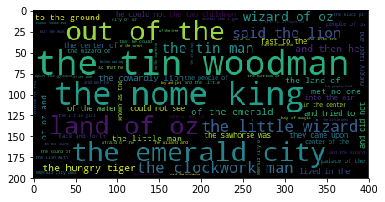

In [78]:
wc = WordCloud()
plt.imshow(wc.generate_from_frequencies(freq_dict_3))

### 4 Grams

In [84]:
ngram_4_counts = vectorizer_4.fit_transform([oz_text])
oz_4_counts = np.array(ngram_3_counts.todense()).flatten()
ngrams_4 = vectorizer_4.vocabulary_

In [85]:
ngrams_4

{'in the splendid palace': 3979,
 'the splendid palace of': 8115,
 'splendid palace of the': 7117,
 'palace of the emerald': 5981,
 'of the emerald city': 5525,
 'the emerald city which': 7682,
 'emerald city which is': 2324,
 'city which is in': 1735,
 'which is in the': 9950,
 'is in the center': 4122,
 'in the center of': 3955,
 'the center of the': 7605,
 'center of the fairy': 1681,
 'of the fairy land': 5526,
 'the fairy land of': 7690,
 'fairy land of oz': 2455,
 'land of oz is': 4441,
 'of oz is great': 5473,
 'oz is great throne': 5909,
 'is great throne room': 4120,
 'great throne room where': 3029,
 'throne room where princess': 8702,
 'room where princess ozma': 6468,
 'where princess ozma the': 9922,
 'princess ozma the ruler': 6182,
 'ozma the ruler for': 5956,
 'the ruler for an': 8035,
 'ruler for an hour': 6494,
 'for an hour each': 2633,
 'an hour each day': 213,
 'hour each day sits': 3737,
 'each day sits in': 2272,
 'day sits in throne': 2004,
 'sits in throne of':

In [86]:
freq_dict_4 = {}
for v, i in vectorizer_4.vocabulary_.items():
    freq_dict_4[v] = oz_4_counts[i]

IndexError: index 10256 is out of bounds for axis 0 with size 10080

In [138]:
sorted_dict_4 = OrderedDict(sorted(freq_dict_4.items(), key=lambda kv: kv[1],  reverse=True))
sorted_dict_4

OrderedDict([('the emerald city which', 2),
             ('which is in the', 2),
             ('on such occasions are', 2),
             ('in the splendid palace', 1),
             ('the splendid palace of', 1),
             ('splendid palace of the', 1),
             ('palace of the emerald', 1),
             ('of the emerald city', 1),
             ('emerald city which is', 1),
             ('city which is in', 1),
             ('is in the center', 1),
             ('in the center of', 1),
             ('the center of the', 1),
             ('center of the fairy', 1),
             ('of the fairy land', 1),
             ('the fairy land of', 1),
             ('fairy land of oz', 1),
             ('land of oz is', 1),
             ('of oz is great', 1),
             ('oz is great throne', 1),
             ('is great throne room', 1),
             ('great throne room where', 1),
             ('throne room where princess', 1),
             ('room where princess ozma', 1),
             ('

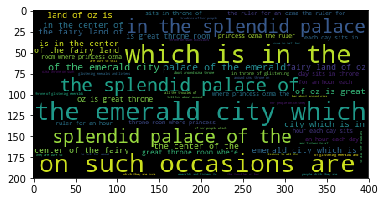

In [87]:
wc = WordCloud()
plt.imshow(wc.generate_from_frequencies(freq_dict_4))

From above, it can be seen that a 4 gram analysis does not provide very much value. BEcause the most amount of times a gram appears is 2, it does not provide a whole lot of benefit to what is appearing the most. The 3 gram analysis does give some insight to word combinations.